# Metaverse Avatar

In [20]:
pip install mesa

Note: you may need to restart the kernel to use updated packages.


In [21]:
from mesa import Agent,Model

Here we define the avatar with all its functionalities

In [22]:
class Agent_Avatar(Agent):
    subjects = {}
    preferences = {}

    # First Deliverable
    def __init__(self):
        print('Hello human, I am your avatar, you can configure me to be as similar to you as possible, my creators are Anthony Garcia, Sebastian Arboleda and Katherin Valencia.')

    # Second Deliverable
    def setScheduleOptions(self, subjects, preferences):
        self.subjects = subjects
        self.preferences = preferences

    def getBetterSchedule(self):
        independent, schedule = self.__isIndependent(list(self.subjects.keys()))

        print("============== BETTER WAY TO CHOOSE SUBJECTS ==============")
        score = 0
        for h in schedule:
            subject, dayTime = h
            score += dayTime[1]
            print('Subject: %s, Schedule: %s, Score: %s' % (subject, str(dayTime[0]), dayTime[1]))
        print('TOTAL SCORE: %i' % score)

    def __isIndependent(self, subjs):
        '''Determines if a set of subjects is independent'''
        subjs = self.__orderSubjects(subjs)
        if len(subjs) == 0:
            return False, []
        score, independent = self.__overlap(subjs)
                        
        return True, independent

    def __orderSubjects(self, subjs):
        ordered = []
        for sub in subjs:
            ordered.append([
                sub, self.preferences['subjects'][sub]
            ])
            ordered = sorted(ordered, key=lambda d: d[1], reverse=True)
        subs = []
        for i in ordered:
            subs.append(i[0])
        return subs

    def __overlap(self, subjs):
        return self.__recursiveOverlap([], subjs)

    def __recursiveOverlap(self, actualSchedule, subjs):
        if len(subjs) == 0:
            return 0, actualSchedule
        actualSbj = subjs[0]
        currentScore = 0
        actualScheduleCopy = actualSchedule.copy()

        for i in self.subjects[actualSbj]:
            if not self.__overlapClass(actualSchedule, i):
                newScore = self.__getScore(actualSbj, i)
                schedule = actualScheduleCopy.copy()
                schedule.append((actualSbj, (i, newScore)))
                score, schedule = self.__recursiveOverlap(schedule, subjs[1:])
                if score + newScore > currentScore:
                    actualSchedule = actualScheduleCopy.copy()
                    currentScore = score + newScore
                    actualSchedule = schedule
            score, schedule = self.__recursiveOverlap(actualSchedule, subjs[1:])
            if score > currentScore:
                actualSchedule = actualScheduleCopy.copy()
                currentScore = score
                actualSchedule = schedule
        return currentScore, actualSchedule


    def __overlapClass(self, schedulesList, actualSchedule):
        overlap = True
        for h2 in actualSchedule:
            currentOverlap = False
            for schedule in schedulesList:
                classes = schedule[1][0]
                for h1 in classes:
                    if h1[0] == h2[0]:
                        # Which one starts before
                        if h1[1] <= h2[1]:
                            first, second = h1, h2  
                        else:
                            first, second = h2, h1
                        currentOverlap = currentOverlap or first[2] > second[1]
            overlap = overlap and currentOverlap
        return overlap

    def __getScore(self, subj, schedule):
        subjScore = self.preferences['subjects'][subj]
        scheduleScore = 0.0
        for i in schedule: 
            scheduleScore += self.preferences['days'][i[0]]
        return scheduleScore/len(schedule) + subjScore


Test data for Second Deliverable

In [23]:
subjects = {
    "AI introduction": [[("Monday","0830","1130")], [("Friday", "0830","1130")]] ,
    "Modern SW development processes":  [[("Friday","1800","2100"), ("Saturday", "0800","1100")]],
    "Projects management":  [[("Monday","0600","0900")]],
    "UX Design": [[("Wednesday","1800","2100")]],
    "Karate":  [[("Monday","1630","1800")], [("Wednesday", "1630","1800")], [("Friday", "1630","1800")]],
    "Rest": [[("Friday","0400","0930")]]
}


preferences = {
    "subjects": {
        "AI introduction": 3,
        "Modern SW development processes": 2,
        "Projects management": 1,
        "UX Design": 1,
        "Karate": 2,
        "Rest": 3,
    },
    "days" : {
        "Monday": 2,
        "Tuesday": 4,
        "Wednesday": 4,
        "Thursday": 4,
        "Friday": 3,
        "Saturday": 1,
    },
}

Here we define the Model

In [24]:
class Model_Avatar(Model):
    agent = {}

    def __init__(self):
        self.agent = Agent_Avatar()

    def secondDeliverable(self):
        self.agent.setScheduleOptions(subjects, preferences)
        self.agent.getBetterSchedule()

## Call for Hello World (1st Deliverable)

In [25]:
Avatar = Model_Avatar()

Hello human, I am your avatar, you can configure me to be as similar to you as possible, my creators are Anthony Garcia, Sebastian Arboleda and Katherin Valencia.


## Call for the Search Problem (2nd Deliverable)


In [26]:
Avatar.secondDeliverable()

============== BETTER WAY TO CHOOSE SUBJECTS ==============
Subject: AI introduction, Schedule: [('Monday', '0830', '1130')], Score: 5.0
Subject: Rest, Schedule: [('Friday', '0400', '0930')], Score: 6.0
Subject: Modern SW development processes, Schedule: [('Friday', '1800', '2100'), ('Saturday', '0800', '1100')], Score: 4.0
Subject: Karate, Schedule: [('Wednesday', '1630', '1800')], Score: 6.0
Subject: UX Design, Schedule: [('Wednesday', '1800', '2100')], Score: 5.0
TOTAL SCORE: 26


In [27]:
%pip install pyswip

Note: you may need to restart the kernel to use updated packages.


# 3rd Deliverable

In [28]:
from pyswip import Prolog

In [29]:
prolog = Prolog()
prolog.consult("prolog.pl")

Here is defined the First chronicle

In [30]:
def isUnderstanding(subject):
    query_args = "understood_class(%s,X)" % (subject.lower().replace(" ","_"))
    query = list(prolog.query(query_args))
    count = 0
    for res in query:
        count+= res["X"]
    return (count/len(query)) >= 0.8

subjects = [
    "AI Introduction",
    "Modern SW development processes",
    "Projects management",
    "UX Design"
]

def calcUnderstanding():
    for i in subjects:
        print("Is understanding %s?" % (i))
        print(isUnderstanding(i))

Here is defined the Second Chronicle

In [31]:
def getAvailableTime():
    query = prolog.query("week(X,Y)")
    freeTime = {}
    for res in query:
        freeTime[res["X"]] = int(res["Y"])
    return freeTime

def printAvailableTime():
    for week, time in getAvailableTime().items():
        print("Available time for week %s: %i" % (week, time))

def  addHomework(name, week, time):
    print("Adding Homework %s..." % (name))
    query = prolog.query("add_homework(%s,%s,%s,X)" % (name.lower().replace(" ","_"), week.lower(), str(time)))
    for res in query:
        print("AvailableTime: "+ str(res["X"]))

def  completeHomework(name, time):
    print("Completed Homework %s..." % (name))
    query = prolog.query("complete_homework(%s,%s,X)" % (name.lower().replace(" ","_"), str(time)))
    for res in query:
        print("AvailableTime: "+ str(res["X"]))

def listPendingHomeworks(week):
    print("Pending Homeworks for week %s:" % (week))
    query = prolog.query("homework(X,%s,Y)" % (week.lower()))
    for res in query:
        print("Homework: %s, Time: %s" % (res["X"],res["Y"]))

def addHomeworks():
    addHomework("Reading Forum", "one", 3)
    addHomework("Task 1", "one", 3)
    addHomework("Task 2", "one", 6)
    addHomework("Task 3", "one", 10)
    addHomework("Task 4", "one", 8)
    addHomework("UX Diagram", "two", 4)
    addHomework("Presentations ", "two", 3)
    addHomework("PMDS Test", "three", 10)
    addHomework("AI Agent", "four", 3)
    addHomework("Task 5", "four", 10)
    addHomework("Task 6", "four", 5)
    addHomework("Task 7", "four", 4)
    addHomework("Task 8", "four", 9)
    addHomework("Task 9", "four", 10)
    addHomework("Task 10", "four", 10)
    addHomework("Delivery 3", "four", 8)

In [32]:
addHomeworks()
printAvailableTime()

Adding Homework Reading Forum...
AvailableTime: 103
AvailableTime: 73
Adding Homework Task 1...
AvailableTime: 100
AvailableTime: 70
Adding Homework Task 2...
AvailableTime: 94
AvailableTime: 64
Adding Homework Task 3...
AvailableTime: 84
AvailableTime: 54
Adding Homework Task 4...
AvailableTime: 76
AvailableTime: 46
Adding Homework UX Diagram...
AvailableTime: 102
AvailableTime: 95
Adding Homework Presentations ...
AvailableTime: 99
AvailableTime: 92
Adding Homework PMDS Test...
AvailableTime: 87
AvailableTime: 77
AvailableTime: 77
Adding Homework AI Agent...
AvailableTime: 94
AvailableTime: 30
Adding Homework Task 5...
AvailableTime: 84
AvailableTime: 20
Adding Homework Task 6...
AvailableTime: 79
AvailableTime: 15
Adding Homework Task 7...
AvailableTime: 75
AvailableTime: 11
Adding Homework Task 8...
AvailableTime: 66
AvailableTime: 2
Adding Homework Task 9...
AvailableTime: 56
AvailableTime: -8
Adding Homework Task 10...
AvailableTime: 46
AvailableTime: -18
Adding Homework Delivery

In [33]:
listPendingHomeworks("four")
completeHomework("AI Agent", 8)
listPendingHomeworks("four")

Pending Homeworks for week four:
Homework: task_5, Time: 10
Homework: task_6, Time: 5
Homework: task_7, Time: 4
Homework: task_8, Time: 9
Homework: task_9, Time: 10
Homework: task_10, Time: 10
Homework: delivery_3, Time: 8
Homework: ai_agent, Time: 3
Homework: ai_agent, Time: 3
Homework: task_5, Time: 10
Homework: task_5, Time: 10
Homework: task_6, Time: 5
Homework: task_6, Time: 5
Homework: task_7, Time: 4
Homework: task_7, Time: 4
Homework: task_8, Time: 9
Homework: task_8, Time: 9
Homework: task_9, Time: 10
Homework: task_9, Time: 10
Homework: task_10, Time: 10
Homework: task_10, Time: 10
Homework: delivery_3, Time: 8
Homework: delivery_3, Time: 8
Completed Homework AI Agent...
AvailableTime: 33
Pending Homeworks for week four:
Homework: task_5, Time: 10
Homework: task_6, Time: 5
Homework: task_7, Time: 4
Homework: task_8, Time: 9
Homework: task_9, Time: 10
Homework: task_10, Time: 10
Homework: delivery_3, Time: 8
Homework: task_5, Time: 10
Homework: task_5, Time: 10
Homework: task_

In [34]:
activities = {
    "Karate": 16,
    "Reading": 10,
}

def hasEnoughFreeTime():
    neededTime = 0
    for act in activities.values():
        neededTime += act
    weeklyTime = {}
    for week,time in getAvailableTime().items():
        condition = time >= neededTime
        weeklyTime[week] = condition
    return weeklyTime

Here is defined the Third Chronicle

In [35]:
weeks = ["one","two","three","four","five","six","seven"]

def isHealthy(week):
    weeklyTime = hasEnoughFreeTime()
    query = list(prolog.query("weekly_health(%s,X)" % (week)))
    score = 0
    for res in query:
        score += res["X"]
    return (score) > 0 and weeklyTime[week]

def calcWeeklyHealth():
    for i in weeks:
        print ("Is healthy on week %s?..." % (i))
        print(isHealthy(i))

Call For first result

In [36]:
calcUnderstanding()

Is understanding AI Introduction?
True
Is understanding Modern SW development processes?
False
Is understanding Projects management?
True
Is understanding UX Design?
True


Call for second result

In [37]:
hasEnoughFreeTime()

{'five': True,
 'six': True,
 'seven': True,
 'one': True,
 'two': True,
 'three': True,
 'four': True}

Call for third result

In [38]:
calcWeeklyHealth()

Is healthy on week one?...
True
Is healthy on week two?...
True
Is healthy on week three?...
True
Is healthy on week four?...
False
Is healthy on week five?...
True
Is healthy on week six?...
False
Is healthy on week seven?...
True


# 4th deliverable

Sistemas que busca anticipar el desempeño del avatar en una actividad universitaria.

Antecedentes (Inputs)

    Worth
    Universo (ie, crisp value range): How much is the activity Worth?
    Fuzzy set (ie, fuzzy value range): low, medium, high

    Interest
    Universo (ie, crisp value range): How interesting is the activity?
    Fuzzy set (ie, fuzzy value range): low, medium, high

    Teamwork
    Universo (ie, crisp value range): How is teamwork performed? 
    Fuzzy set (ie, fuzzy value range): low, medium, high

Consecuentes (Outputs)

    Performance
    Universe: ¿Qué tan desempeño se espera en la actividad?
    Fuzzy set: low, medium, high

Reglas

    -IF the activity has a HIGH worth and has a HIGH interest and has a HIGH teamwork, THEN the performance will be HIGH.

    -IF the activity has a MEDIUM worth and has a HIGH interest and has a HIGH teamwork, THEN the performance will be HIGH.

    -IF the activity has a LOW worth and has a HIGH interest and has a LOW teamwork, THEN the performance will be MEDIUM.

    -IF the activity has a HIGH worth and has a LOW interest and has a HIGH teamwork, THEN the performance will be MEDIUM.
    
    -IF the activity has a MEDIUM worth and has a LOW interest and has a MEDIUM teamwork, THEN the performance will be LOW.

In [7]:
%pip install -U scikit-fuzzy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\sarboledab\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


  Using cached fonttools-4.37.3-py3-none-any.whl (959 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'C:\Users\sarboledab\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [73]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
worth = ctrl.Antecedent(np.arange(0, 11, 1), 'worth')
interest = ctrl.Antecedent(np.arange(0, 11, 1), 'interest')
teamwork = ctrl.Antecedent(np.arange(0, 11, 1), 'teamwork')

performance = ctrl.Consequent(np.arange(0, 51, 1), 'performance')

# Auto-membership function population is possible with .automf(3, 5, or 7)
worth.automf(3)
interest.automf(3)
teamwork.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
performance['low'] = fuzz.pimf(performance.universe, 0, 0, 20, 30)
performance['medium'] = fuzz.pimf(performance.universe, 25, 30, 35, 40)
performance['high'] = fuzz.pimf(performance.universe, 35, 40, 50, 50)

C:\Users\sarboledab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\skfuzzy\membership\generatemf.py:231: RuntimeWarning: invalid value encountered in divide
  y[idx] = 2. * ((x[idx] - a) / (b - a)) ** 2.
C:\Users\sarboledab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\skfuzzy\membership\generatemf.py:240: RuntimeWarning: invalid value encountered in divide
  y[idx] = 2. * ((x[idx] - d) / (d - c)) ** 2.


C:\Users\sarboledab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


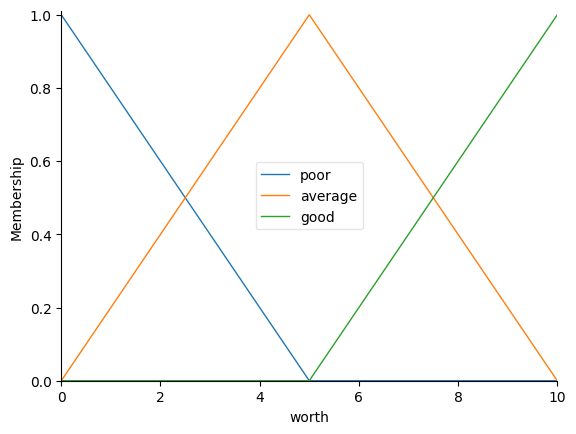

In [74]:
worth.view()

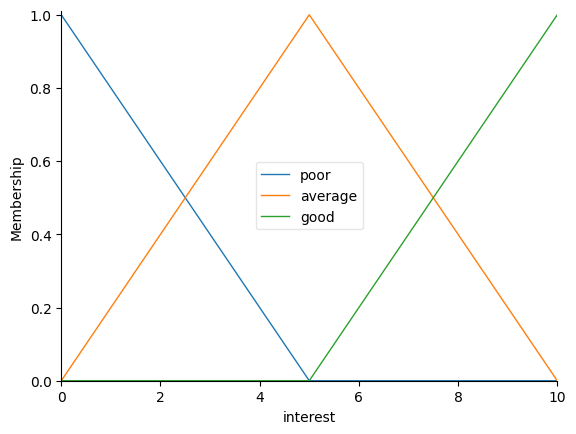

In [75]:
interest.view()

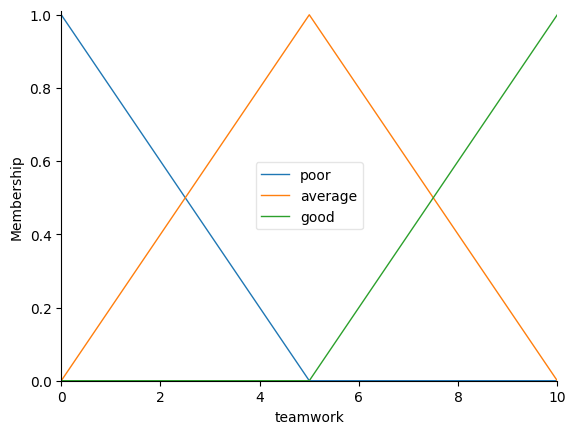

In [76]:
teamwork.view()

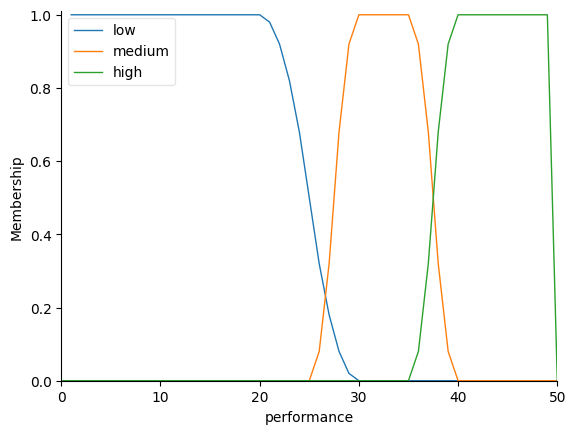

In [77]:
performance.view()

(<Figure size 640x480 with 1 Axes>, <AxesSubplot: >)

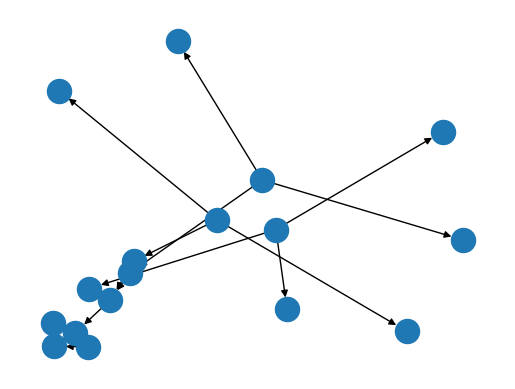

In [78]:
rule1 = ctrl.Rule(worth['good'] & interest['good'] & teamwork['good'], performance['high'])
rule2 = ctrl.Rule(worth['average'] & interest['good'] & teamwork['good'], performance['high'])
rule3 = ctrl.Rule(worth['poor'] & interest['good'] & teamwork['poor'], performance['medium'])
rule4 = ctrl.Rule(worth['good'] & interest['poor'] & teamwork['good'], performance['medium'])
rule5 = ctrl.Rule(worth['average'] & interest['poor'] & teamwork['average'], performance['low'])

rule1.view()

In [79]:
performance_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])

In [81]:
result = ctrl.ControlSystemSimulation(performance_ctrl)

In [84]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
result.input['worth'] = 9.8
result.input['interest'] = 9.8
result.input['teamwork'] = 9.5

# Crunch the numbers
result.compute()

OrderedDict([('performance', nan)])


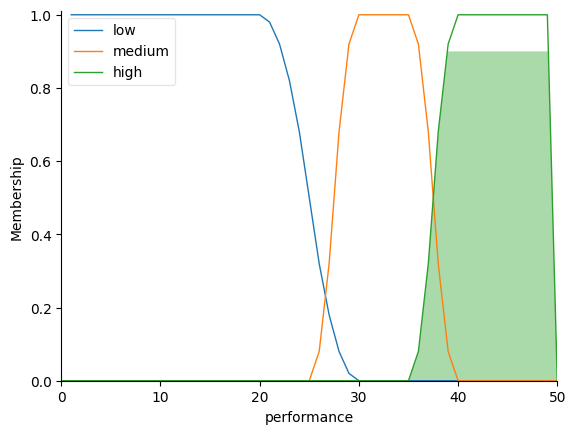

In [86]:
print (result.output['performance'])
performance.view(sim=result)